# PROBLEM STATEMENT

You have been hired as a consultant to a start-up that is running a targetted marketing ads on facebook. The company wants to anaylze customer behaviour by predicting which customer clicks on the advertisement. Customer data is as follows: 

Inputs: 
- Name 
- e-mail 
- Country 
- Time on Facebook 
- Estimated Salary (derived from other parameters)

Outputs:
- Click (1: customer clicked on Ad, 0: Customer did not click on the Ad)

# STEP #0: LIBRARIES IMPORT


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# STEP #1: IMPORT DATASET

In [2]:
dataset = pd.read_csv('Facebook_Ads_2.csv')

In [3]:
dataset

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.060060,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.076740,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.608260,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.355360,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.112760,0
5,Carla Hester,mi@Aliquamerat.edu,Liberia,52.009946,80642.652220,1
6,Griffin Rivera,vehicula@at.co.uk,Syria,42.881370,61908.398150,1
7,Orli Casey,nunc.est.mollis@Suspendissetristiqueneque.co.uk,Czech Republic,25.676920,29851.411530,0
8,Marny Obrien,Phasellus@sedsemegestas.org,Armenia,40.698233,34281.118780,1
9,Rhonda Chavez,nec@nuncest.com,Somalia,29.687362,41098.878810,0


# STEP #2: EXPLORE/VISUALIZE DATASET

In [4]:
# Let's count the number of the people who clicked and did not click on the advertisment
click_on_ad = dataset[dataset['Clicked']==1]
did_not_click = dataset[dataset['Clicked']==0]


In [5]:
# Counting some values
print('Total = ',len(dataset))
print('Number of customers who clicked on Ad = ',len(click_on_ad ))
print('Percentage Clicked = ', 1.* len(click_on_ad)/len(dataset) * 100, "%")
print('Did not click =', len(did_not_click))
print('Percentage who did not Click = ', 1.* len(did_not_click)/len(dataset) * 100, "%")

('Total = ', 499)
('Number of customers who clicked on Ad = ', 250)
('Percentage Clicked = ', 50.1002004008016, '%')
('Did not click =', 249)
('Percentage who did not Click = ', 49.899799599198396, '%')


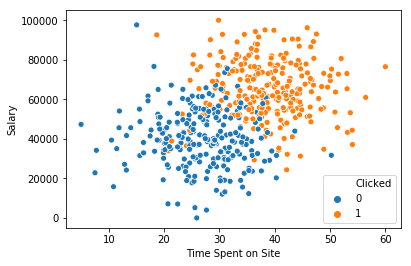

In [6]:
# plot the scatterplot of 'Time Spent on Site' versus 'Salary'
sns.scatterplot(dataset['Time Spent on Site'], dataset['Salary'], hue = dataset['Clicked'])

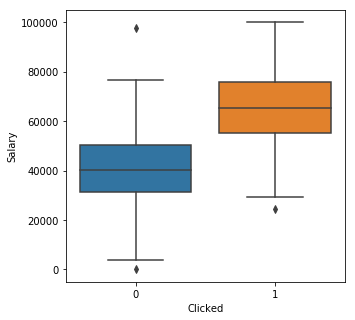

In [7]:
# plotting the boxplot to see the average salary of the people who clicked and who did not click on the ad
plt.figure(figsize = [5,5])
sns.boxplot(dataset['Clicked'], dataset['Salary'])

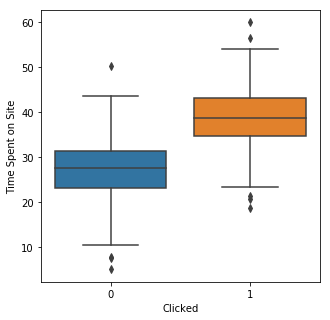

In [8]:
# plotting the boxplot to see the average 'Time Spent on Site' of the people who clicked and who did not click on the ad
plt.figure(figsize = [5,5])
sns.boxplot(dataset['Clicked'], dataset['Time Spent on Site'])

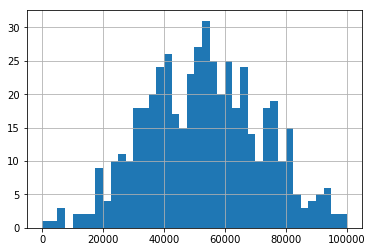

In [9]:
# Salary histogram
dataset['Salary'].hist(bins = 40)

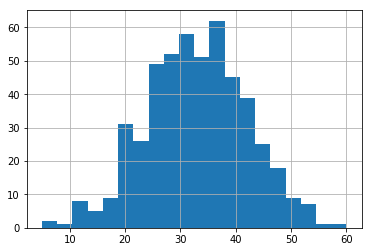

In [10]:
# 'Time Spent on Site' histogram 
dataset['Time Spent on Site'].hist(bins = 20)

# STEP #3: PREPARE THE DATA FOR TRAINING/ DATA CLEANING 

In [11]:
dataset

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.060060,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.076740,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.608260,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.355360,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.112760,0
5,Carla Hester,mi@Aliquamerat.edu,Liberia,52.009946,80642.652220,1
6,Griffin Rivera,vehicula@at.co.uk,Syria,42.881370,61908.398150,1
7,Orli Casey,nunc.est.mollis@Suspendissetristiqueneque.co.uk,Czech Republic,25.676920,29851.411530,0
8,Marny Obrien,Phasellus@sedsemegestas.org,Armenia,40.698233,34281.118780,1
9,Rhonda Chavez,nec@nuncest.com,Somalia,29.687362,41098.878810,0


In [12]:
#Let's drop the emails, country and names (we can make use of the country later!)
dataset.drop( ['emails' , 'Country', 'Names'], axis = 1 , inplace = True)

In [13]:
dataset

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.060060,0
1,32.456107,79049.076740,1
2,20.945978,41098.608260,0
3,54.039325,37143.355360,1
4,34.249729,37355.112760,0
5,52.009946,80642.652220,1
6,42.881370,61908.398150,1
7,25.676920,29851.411530,0
8,40.698233,34281.118780,1
9,29.687362,41098.878810,0


In [14]:
#Let's drop the target coloumn before we do train test split
y = dataset['Clicked'].values
X = dataset.drop('Clicked', axis = 1).values

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)





# STEP#4: MODEL TRAINING

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Splitting the data into 80% training and 20% testing set
X_train , X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22 )

In [18]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# STEP#5: MODEL TESTING

In [19]:
# predicting training set results
y_predict_train = classifier.predict(X_train)
y_predict_train

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,

In [20]:
y_train

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,

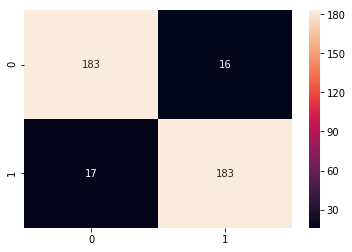

In [21]:
# Making the Confusion Matrix of training set to see our model performance
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm , annot = True, fmt = "d")

In [22]:
# Displaying our model results (training set)
from sklearn.metrics import classification_report
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       199
           1       0.92      0.92      0.92       200

   micro avg       0.92      0.92      0.92       399
   macro avg       0.92      0.92      0.92       399
weighted avg       0.92      0.92      0.92       399



In [23]:
# predicting testing set results
y_pred_test = classifier.predict(X_test)
y_pred_test

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0])

In [24]:
X.shape

(499, 2)

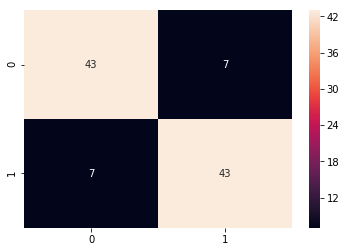

In [25]:
# Making the Confusion Matrix of testing set to see our model performance
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm , annot = True ,fmt = "d")

In [26]:
# Displaying our model results (testing set)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        50
           1       0.86      0.86      0.86        50

   micro avg       0.86      0.86      0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



# STEP #6: VISUALIZING TRAINING AND TESTING DATASETS

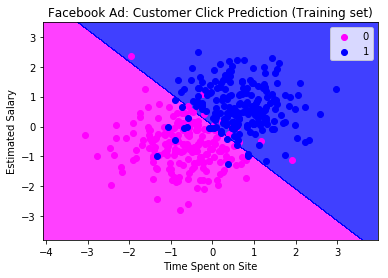

In [27]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

# Create a meshgrid ranging from the minimum to maximum value for both features
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

# plot the boundary using the trained classifier
# Run the classifier to predict the outcome on all pixels with resolution of 0.01
# Colouring the pixels with 0 or 1
# If classified as 0 it will be magenta, and if it is classified as 1 it will be shown in blue 
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# plot all the actual training points

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
    
plt.title('Facebook Ad: Customer Click Prediction (Training set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

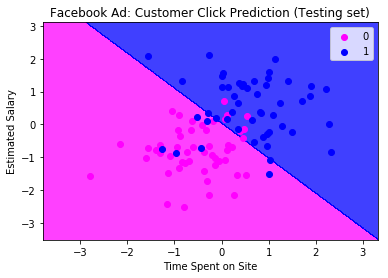

In [28]:
# Visualising the Testing set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('Facebook Ad: Customer Click Prediction (Testing set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()